In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving rainfall in india 1901-2015.xlsx to rainfall in india 1901-2015.xlsx
Saving flood dataset.xlsx to flood dataset.xlsx


In [ ]:
dataset = pd.read_excel("flood dataset.xlsx")


In [ ]:
dataset.head()


,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0


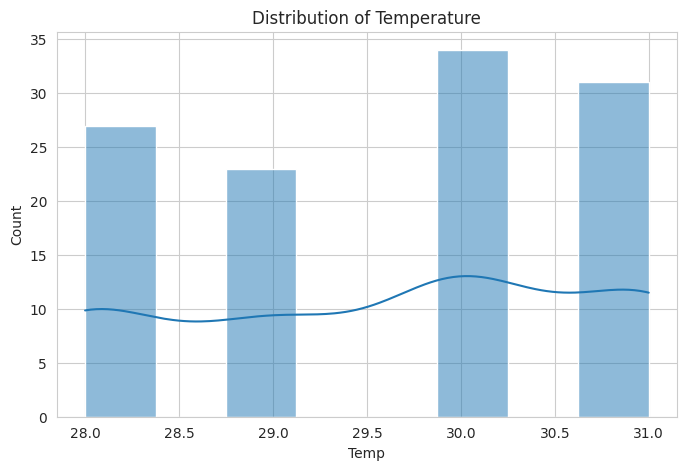

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(dataset['Temp'], kde=True)
plt.title("Distribution of Temperature")
plt.show()


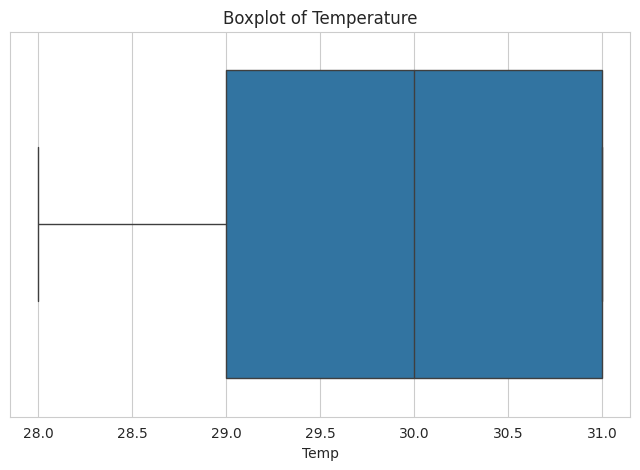

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=dataset['Temp'])
plt.title("Boxplot of Temperature")
plt.show()


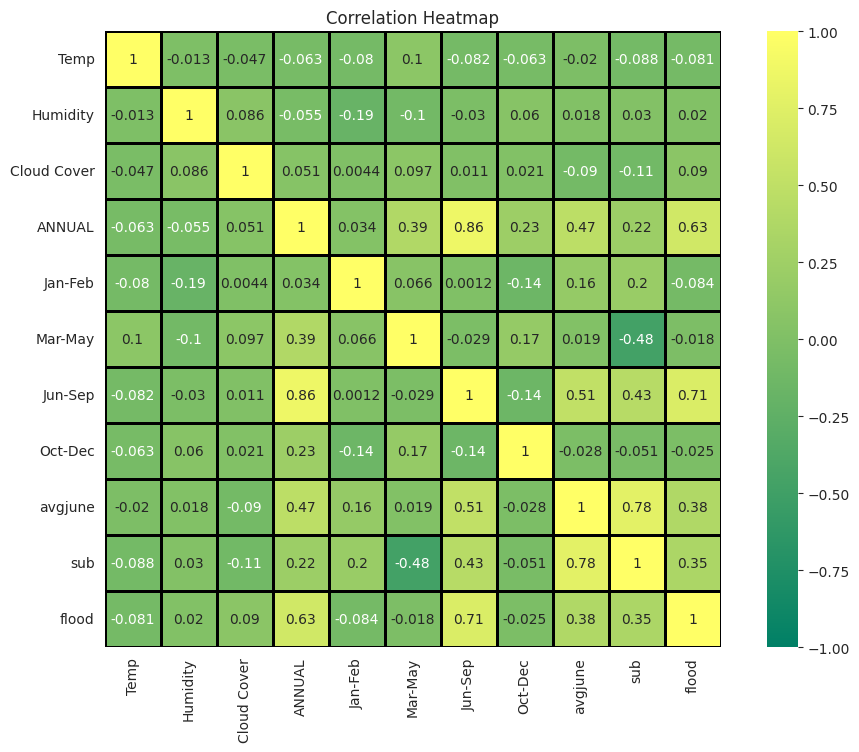

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(),
            annot=True,
            cmap='summer',
            linewidths=1,
            linecolor='black',
            square=True,
            vmin=-1, vmax=1)

plt.title("Correlation Heatmap")
plt.show()


In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temp         115 non-null    int64  
 1   Humidity     115 non-null    int64  
 2   Cloud Cover  115 non-null    int64  
 3   ANNUAL       115 non-null    float64
 4   Jan-Feb      115 non-null    float64
 5   Mar-May      115 non-null    float64
 6   Jun-Sep      115 non-null    float64
 7   Oct-Dec      115 non-null    float64
 8   avgjune      115 non-null    float64
 9   sub          115 non-null    float64
 10  flood        115 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 10.0 KB


In [ ]:
dataset.describe()


,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,29.600000,73.852174,36.286957,2925.487826,27.739130,377.253913,2022.840870,497.636522,218.100870,439.801739,0.139130
std,1.122341,2.947623,4.330158,422.112193,22.361032,151.091850,386.254397,129.860643,62.547597,210.438813,0.347597
min,28.000000,70.000000,30.000000,2068.800000,0.300000,89.900000,1104.300000,166.600000,65.600000,34.200000,0.000000
25%,29.000000,71.000000,32.500000,2627.900000,10.250000,276.750000,1768.850000,407.450000,179.666667,295.000000,0.000000
50%,30.000000,74.000000,36.000000,2937.500000,20.500000,342.000000,1948.700000,501.500000,211.033333,430.600000,0.000000
75%,31.000000,76.000000,40.000000,3164.100000,41.600000,442.300000,2242.900000,584.550000,263.833333,577.650000,0.000000
max,31.000000,79.000000,44.000000,4257.800000,98.100000,915.200000,3451.300000,823.300000,366.066667,982.700000,1.000000


In [ ]:
dataset.isnull().sum()


,0
Temp,0
Humidity,0
Cloud Cover,0
ANNUAL,0
Jan-Feb,0
Mar-May,0
Jun-Sep,0
Oct-Dec,0
avgjune,0
sub,0


In [ ]:
dataset.isnull().sum()


,0
Temp,0
Humidity,0
Cloud Cover,0
ANNUAL,0
Jan-Feb,0
Mar-May,0
Jun-Sep,0
Oct-Dec,0
avgjune,0
sub,0


In [ ]:
X = dataset[['Cloud Cover', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep']]
y = dataset['flood']



In [ ]:
print(dataset.columns)


Index(['Temp', 'Humidity', 'Cloud Cover', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec', 'avgjune', 'sub', 'flood'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=10, stratify=y
)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

joblib.dump(model, "flood_model.pkl")
joblib.dump(scaler, "standard_scaler.pkl")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [10:14:12] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['standard_scaler.pkl']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=10,
    stratify=y   # important if classification
)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Fit ONLY on training data
X_train = sc.fit_transform(X_train)

# Transform test data using same scaler
X_test = sc.transform(X_test)


In [ ]:
import joblib

joblib.dump(sc, "standard_scaler.pkl")


['standard_scaler.pkl']

In [ ]:
from google.colab import files
files.download("standard_scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Q1 = dataset['Temp'].quantile(0.25)
Q3 = dataset['Temp'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower:", lower_bound)
print("Upper:", upper_bound)


Lower: 26.0
Upper: 34.0


In [ ]:
dataset['Temp'] = np.where(dataset['Temp'] > upper_bound,
                           upper_bound,
                           dataset['Temp'])

dataset['Temp'] = np.where(dataset['Temp'] < lower_bound,
                           lower_bound,
                           dataset['Temp'])


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [ ]:
dt_model = DecisionTreeClassifier(random_state=10)

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=10
)

knn_model = KNeighborsClassifier(n_neighbors=5)

xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=10
)


In [ ]:
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [10:14:52] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
def evaluate_model(name, y_test, y_pred):
    print("========", name, "========")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\n")


In [ ]:
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("KNN", y_test, knn_pred)
evaluate_model("XGBoost", y_test, xgb_pred)


======== Decision Tree ========
Accuracy: 1.0

Confusion Matrix:
 [[25  0]
 [ 0  4]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         4

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



======== Random Forest ========
Accuracy: 1.0

Confusion Matrix:
 [[25  0]
 [ 0  4]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         4

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



======== KNN ========
Accuracy: 0.9310344827586207

Confusion Matrix:
 [[24  1]
 [ 1  3]]

Classification Report:
        

In [ ]:
best_model = xgb_model


In [ ]:
import joblib

joblib.dump(best_model, "flood_model.pkl")


['flood_model.pkl']

In [ ]:
from google.colab import files
files.download("flood_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

joblib.dump(model, "flood_model.pkl")
joblib.dump(scaler, "standard_scaler.pkl")


['standard_scaler.pkl']

In [ ]:
%%writefile app.py

from flask import Flask, render_template_string, request
import numpy as np
import joblib

app = Flask(__name__)

model = joblib.load("flood_model.pkl")
scaler = joblib.load("standard_scaler.pkl")

HTML_FORM = """
<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>Flood Prediction System</title>

<style>

body {
    margin: 0;
    font-family: 'Segoe UI', sans-serif;
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    height: 100vh;
    display: flex;
    flex-direction: column;
}

.navbar {
    background: rgba(0, 0, 0, 0.3);
    padding: 15px 40px;
    display: flex;
    justify-content: space-between;
    align-items: center;
    color: white;
    backdrop-filter: blur(10px);
}

.navbar h2 {
    margin: 0;
}

.container {
    flex: 1;
    display: flex;
    justify-content: center;
    align-items: center;
}

.card {
    background: rgba(255, 255, 255, 0.15);
    padding: 40px;
    border-radius: 15px;
    backdrop-filter: blur(15px);
    box-shadow: 0 8px 32px rgba(0,0,0,0.3);
    width: 400px;
    color: white;
    animation: fadeIn 1s ease-in-out;
}

.card h3 {
    text-align: center;
    margin-bottom: 25px;
}

input {
    width: 100%;
    padding: 10px;
    margin: 8px 0;
    border: none;
    border-radius: 8px;
    outline: none;
}

button {
    width: 100%;
    padding: 12px;
    margin-top: 15px;
    border: none;
    border-radius: 8px;
    background: linear-gradient(90deg, #00c6ff, #0072ff);
    color: white;
    font-size: 16px;
    cursor: pointer;
    transition: 0.3s ease;
}

button:hover {
    transform: scale(1.05);
    box-shadow: 0 0 15px #00c6ff;
}

.result {
    margin-top: 20px;
    text-align: center;
    font-weight: bold;
    font-size: 18px;
    color: #ffd700;
}

footer {
    text-align: center;
    padding: 15px;
    background: rgba(0, 0, 0, 0.3);
    color: white;
    font-size: 14px;
}

@keyframes fadeIn {
    from { opacity: 0; transform: translateY(20px); }
    to { opacity: 1; transform: translateY(0); }
}

</style>
</head>

<body>

<div class="navbar">
    <h2>Flood Risk Prediction</h2>
    <span>Machine Learning Powered</span>
</div>

<div class="container">
    <div class="card">
        <h3>Enter Rainfall Details</h3>

        <form method="POST" action="/predict">
            <input type="number" step="any" name="cloud_cover" placeholder="Cloud Cover (%)" required>
            <input type="number" step="any" name="annual" placeholder="Annual Rainfall (mm)" required>
            <input type="number" step="any" name="jan_feb" placeholder="Jan-Feb Rainfall (mm)" required>
            <input type="number" step="any" name="mar_may" placeholder="Mar-May Rainfall (mm)" required>
            <input type="number" step="any" name="jun_sep" placeholder="Jun-Sep Rainfall (mm)" required>

            <button type="submit">Predict Flood Risk</button>
        </form>

        {% if prediction %}
        <div class="result">
            {{ prediction }}
        </div>
        {% endif %}
    </div>
</div>

<footer>
    © 2026 Flood Prediction System | Developed with Flask & XGBoost
</footer>

</body>
</html>
"""


@app.route("/", methods=["GET"])
def home():
    return render_template_string(HTML_FORM)

@app.route("/predict", methods=["POST"])
def predict():
    try:
        cloud_cover = float(request.form["cloud_cover"])
        annual = float(request.form["annual"])
        jan_feb = float(request.form["jan_feb"])
        mar_may = float(request.form["mar_may"])
        jun_sep = float(request.form["jun_sep"])

        data = np.array([[cloud_cover, annual, jan_feb, mar_may, jun_sep]])
        scaled_data = scaler.transform(data)

        prediction = model.predict(scaled_data)[0]
        prob = model.predict_proba(scaled_data)[0][1]

        if prediction == 1:
            result = f"High Flood Risk ({prob*100:.2f}% probability)"
        else:
            result = f"Low Flood Risk ({(1-prob)*100:.2f}% probability)"

        return render_template_string(HTML_FORM, prediction=result)

    except Exception as e:
        return str(e)

if __name__ == "__main__":
    app.run()


Overwriting app.py


In [ ]:
from pyngrok import ngrok
import os

public_url = ngrok.connect(5000)
print("Public URL:", public_url)

!python app.py


Public URL: NgrokTunnel: "https://samariform-kurt-violable.ngrok-free.dev" -> "http://localhost:5000"
 * Serving Flask app 'app'
 * Debug mode: off
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [20/Feb/2026 11:29:16] "GET / HTTP/1.1" 200 -
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [20/Feb/2026 11:32:22] "POST /predict HTTP/1.1" 200 -
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [20/Feb/2026 11:34:05] "POST /predict HTTP/1.1" 200 -
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [20/Feb/2026 11

In [ ]:
!pip install pyngrok


In [ ]:
from pyngrok import ngrok


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(5000)
print(public_url)


ERROR:pyngrok.process.ngrok:t=2026-02-17T14:28:41+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2026-02-17T14:28:41+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2026-02-17T14:28:41+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [ ]:
!pip install pyngrok --quiet

from pyngrok import ngrok

ngrok.set_auth_token("39njGs6yVOWmEgao3hEnxqnZgcG_jaBvY5dYb7WpiRq8DkRi")


In [ ]:
public_url = ngrok.connect(5000)
print("Public URL:", public_url)


Public URL: NgrokTunnel: "https://samariform-kurt-violable.ngrok-free.dev" -> "http://localhost:5000"


In [ ]:
!python app.py


python3: can't open file '/content/app.py': [Errno 2] No such file or directory


In [ ]:
%%writefile app.py

from flask import Flask, render_template_string, request
import numpy as np
import joblib

app = Flask(__name__)

# Load trained model and scaler
model = joblib.load("flood_model.pkl")
scaler = joblib.load("standard_scaler.pkl")

HTML_FORM = """
<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>Flood Prediction System</title>

<style>

body {
    margin: 0;
    font-family: 'Segoe UI', sans-serif;
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    height: 100vh;
    display: flex;
    flex-direction: column;
}

.navbar {
    background: rgba(0, 0, 0, 0.3);
    padding: 15px 40px;
    display: flex;
    justify-content: space-between;
    align-items: center;
    color: white;
    backdrop-filter: blur(10px);
}

.navbar h2 {
    margin: 0;
}

.container {
    flex: 1;
    display: flex;
    justify-content: center;
    align-items: center;
}

.card {
    background: rgba(255, 255, 255, 0.15);
    padding: 40px;
    border-radius: 15px;
    backdrop-filter: blur(15px);
    box-shadow: 0 8px 32px rgba(0,0,0,0.3);
    width: 400px;
    color: white;
    animation: fadeIn 1s ease-in-out;
}

.card h3 {
    text-align: center;
    margin-bottom: 25px;
}

input {
    width: 100%;
    padding: 10px;
    margin: 8px 0;
    border: none;
    border-radius: 8px;
    outline: none;
}

button {
    width: 100%;
    padding: 12px;
    margin-top: 15px;
    border: none;
    border-radius: 8px;
    background: linear-gradient(90deg, #00c6ff, #0072ff);
    color: white;
    font-size: 16px;
    cursor: pointer;
    transition: 0.3s ease;
}

button:hover {
    transform: scale(1.05);
    box-shadow: 0 0 15px #00c6ff;
}

.result {
    margin-top: 20px;
    text-align: center;
    font-weight: bold;
    font-size: 18px;
    color: #ffd700;
}

footer {
    text-align: center;
    padding: 15px;
    background: rgba(0, 0, 0, 0.3);
    color: white;
    font-size: 14px;
}

@keyframes fadeIn {
    from { opacity: 0; transform: translateY(20px); }
    to { opacity: 1; transform: translateY(0); }
}

</style>
</head>

<body>

<div class="navbar">
    <h2>Flood Risk Prediction</h2>
    <span>Machine Learning Powered</span>
</div>

<div class="container">
    <div class="card">
        <h3>Enter Rainfall Details</h3>

        <form method="POST" action="/predict">
            <input type="number" step="any" name="cloud_cover" placeholder="Cloud Cover (%)" required>
            <input type="number" step="any" name="annual" placeholder="Annual Rainfall (mm)" required>
            <input type="number" step="any" name="jan_feb" placeholder="Jan-Feb Rainfall (mm)" required>
            <input type="number" step="any" name="mar_may" placeholder="Mar-May Rainfall (mm)" required>
            <input type="number" step="any" name="jun_sep" placeholder="Jun-Sep Rainfall (mm)" required>

            <button type="submit">Predict Flood Risk</button>
        </form>

        {% if prediction %}
        <div class="result">
            {{ prediction }}
        </div>
        {% endif %}
    </div>
</div>

<footer>
    © 2026 Flood Prediction System | Developed with Flask & XGBoost
</footer>

</body>
</html>
"""

@app.route("/", methods=["GET"])
def home():
    return render_template_string(HTML_FORM)

@app.route("/predict", methods=["POST"])
def predict():
    try:
        cloud_cover = float(request.form["cloud_cover"])
        annual = float(request.form["annual"])
        jan_feb = float(request.form["jan_feb"])
        mar_may = float(request.form["mar_may"])
        jun_sep = float(request.form["jun_sep"])

        data = np.array([[cloud_cover, annual, jan_feb, mar_may, jun_sep]])
        scaled_data = scaler.transform(data)

        prediction = model.predict(scaled_data)[0]
        prob = model.predict_proba(scaled_data)[0][1]

        if prediction == 1:
            result = f"High Flood Risk ({prob*100:.2f}% probability)"
        else:
            result = f"Low Flood Risk ({(1-prob)*100:.2f}% probability)"

        return render_template_string(HTML_FORM, prediction=result)

    except Exception as e:
        return str(e)

if __name__ == "__main__":
    app.run()


Writing app.py


In [ ]:
!python app.py

Traceback (most recent call last):
  File "/content/app.py", line 9, in <module>
    model = joblib.load("flood_model.pkl")
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/joblib/numpy_pickle.py", line 735, in load
    with open(filename, "rb") as f:
         ^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: 'flood_model.pkl'


In [ ]:
public_url = ngrok.connect(5000)
print("Public URL:", public_url)


Public URL: NgrokTunnel: "https://samariform-kurt-violable.ngrok-free.dev" -> "http://localhost:5000"


In [ ]:
!python app.py

 * Serving Flask app 'app'
 * Debug mode: off
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [17/Feb/2026 15:11:23] "GET / HTTP/1.1" 200 -
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [17/Feb/2026 15:12:20] "POST /predict HTTP/1.1" 200 -
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [17/Feb/2026 15:12:36] "POST /predict HTTP/1.1" 200 -
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [17/Feb/2026 15:13:04] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [17/Feb/2026 15:15:21] "GET / HTTP/1.1" 200 -
/us

In [ ]:
print(X.shape)
print(scaler.mean_.shape)
print(X.columns)


(115, 5)
(5,)
Index(['Cloud Cover', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep'], dtype='object')


In [ ]:
data = np.array([[f1, f2, f3, f4, f5, f6, f7, f8, f9, f10]])


NameError: name 'f1' is not defined

In [ ]:
print(dataset.columns)


Index(['Temp', 'Humidity', 'Cloud Cover', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec', 'avgjune', 'sub', 'flood'],
      dtype='object')


In [ ]:
X = dataset[['Cloud Cover', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep']]
y = dataset['flood']


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.25,
    random_state=10,
    stratify=y
)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

joblib.dump(model, "flood_model.pkl")
joblib.dump(scaler, "standard_scaler.pkl")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:24:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['standard_scaler.pkl']

In [ ]:
!python app.py

python3: can't open file '/content/app.py': [Errno 2] No such file or directory


In [ ]:
public_url = ngrok.connect(5000)
print("Public URL:", public_url)


NameError: name 'ngrok' is not defined

In [ ]:
print(dataset.columns)


Index(['Temp', 'Humidity', 'Cloud Cover', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec', 'avgjune', 'sub', 'flood'],
      dtype='object')
